In [1]:
import numpy as np
np.set_printoptions(edgeitems=10,linewidth=180, precision=4)
import pandas as pd
from sklearn import linear_model
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6
import string
import json
from math import sqrt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### 1. Read data

In [3]:
products = pd.read_csv('gdrive/My Drive/uwml/amazon_baby_subset.csv')
products.head()

,name,review,rating,sentiment
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1


In [4]:
# Count sentiment
products.sentiment.value_counts()

 1    26579
-1    26493
Name: sentiment, dtype: int64

#### 2. Clean punctuation

In [5]:
# Load words dataset
with open('gdrive/My Drive/uwml/important_words.json', 'r') as words:
    important_words = json.load(words)

important_words[0:14]

['baby',
 'one',
 'great',
 'love',
 'use',
 'would',
 'like',
 'easy',
 'little',
 'seat',
 'old',
 'well',
 'get',
 'also']

In [6]:
# Fill na's
products = products.fillna({'review':''})

# Remove punctuation
trans_table = str.maketrans(dict.fromkeys(string.punctuation, ''))

def remove_punctuation(text):
    return text.translate(trans_table)

products['review_clean'] = products['review'].astype(str).apply(remove_punctuation)

products.head()

,name,review,rating,sentiment,review_clean
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1,All of my kids have cried nonstop when I tried...
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1,We wanted to get something to keep track of ou...
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1,My daughter had her 1st baby over a year ago S...
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1,One of babys first and favorite books and it i...
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1,Very cute interactive book My son loves this b...


#### 3/4. Word counts

In [7]:
for word in important_words:
    products[word] = products['review_clean'].apply(lambda s : s.split().count(word))

products

<ipython-input-7-b895b4d3f145>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  products[word] = products['review_clean'].apply(lambda s : s.split().count(word))


,name,review,rating,sentiment,review_clean,baby,one,great,love,use,...,seems,picture,completely,wish,buying,babies,won,tub,almost,either
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1,All of my kids have cried nonstop when I tried...,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1,We wanted to get something to keep track of ou...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1,My daughter had her 1st baby over a year ago S...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1,One of babys first and favorite books and it i...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1,Very cute interactive book My son loves this b...,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53067,"Samsung Baby Care Washer, Stainless Platinum, ...","My infant goes to a really crappy daycare, and...",1,-1,My infant goes to a really crappy daycare and ...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53068,"Mud Pie Milestone Stickers, Boy",Pretty please open and inspect these stickers ...,1,-1,Pretty please open and inspect these stickers ...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53069,Best BIB for Baby - Soft Bib (Pink-Elephant),Great 5-Star Product but An Obvious knock-off ...,1,-1,Great 5Star Product but An Obvious knockoff of...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53070,Bouncy&reg; Inflatable Real Feel Hopping Cow,When I received the item my initial thought wa...,2,-1,When I received the item my initial thought wa...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 5. Train / validation split

In [8]:
#train_data, validation_data = products.random_split(.8, seed=2)
with open('gdrive/My Drive/uwml/module-4-assignment-train-idx.json', 'r') as t:
    train_idx = json.load(t)

with open('gdrive/My Drive/uwml/module-4-assignment-validation-idx.json', 'r') as v:
    validation_idx = json.load(v)

print(len(train_idx))
print(len(validation_idx))

42361
10711


In [9]:
train_data = products.loc[train_idx,:]
validation_data = products.loc[validation_idx,:]

#### 6. Data frame to ndarray

In [10]:
def get_numpy_data(dataframe, features, label):
    dataframe['constant'] = 1
    features = ['constant'] + features
    feature_frame = dataframe[features]
    label_series = dataframe[label]
    return(feature_frame.values, label_series.values)

feature_matrix_train, sentiment_train = get_numpy_data(train_data, important_words, 'sentiment')
feature_matrix_valid, sentiment_valid = get_numpy_data(validation_data, important_words, 'sentiment')

print(feature_matrix_train.shape[0])
print(feature_matrix_valid.shape[0])

42361
10711


#### 7. Logistic regression - no L2 penalty

In [11]:
def predict_probability(feature_matrix, coefficients):
    # Take dot product of feature_matrix and coefficients  
    score = np.dot(feature_matrix, coefficients)
    
    # Compute P(y_i = +1 | x_i, w) using the link function
    predictions = 1 / (1 + np.exp(-score))
    
    # return predictions
    return predictions

#### 8/9. Add L2 penalty

In [12]:
def feature_derivative_with_L2(errors, feature, coefficient, l2_penalty, feature_is_constant):
  # Dot product of errors and features
  derivative = np.dot(errors, feature)

  if not feature_is_constant:
    derivative = derivative - (2 * l2_penalty * coefficient)
  
  return derivative

#### 10. Compute log-likelihood

In [13]:
def compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients, l2_penalty):
    indicator = (sentiment==+1)
    scores = np.dot(feature_matrix, coefficients)
    
    lp = np.sum((indicator-1)*scores - np.log(1. + np.exp(-scores))) - l2_penalty*np.sum(coefficients[1:]**2)
    
    return lp

#### 11. Logistic regression function

In [14]:
def logistic_regression_with_L2(feature_matrix, sentiment, initial_coefficients, step_size, l2_penalty, max_iter, verbose=False):
    coefficients = np.array(initial_coefficients) # make sure it's a numpy array
    for itr in range(max_iter):
        # Predict P(y_i = +1|x_i,w) using your predict_probability() function
        predictions = predict_probability(feature_matrix, coefficients)
        
        # Compute indicator value for (y_i = +1)
        indicator = (sentiment==+1)
        
        # Compute the errors as indicator - predictions
        errors = indicator - predictions
        for j in range(len(coefficients)): # loop over each coefficient
            is_intercept = (j == 0)
            
            # Recall that feature_matrix[:,j] is the feature column associated with coefficients[j].
            # Compute the derivative for coefficients[j]. Save it in a variable called derivative
            derivative = feature_derivative_with_L2(errors, feature_matrix[:,j], coefficient=coefficients[j], l2_penalty=l2_penalty, feature_is_constant=is_intercept)
            
            # add the step size times the derivative to the current coefficient
            coefficients[j] = coefficients[j] + (derivative * step_size)
        
        # Checking whether log likelihood is increasing
        if verbose:
          if itr <= 15 or (itr <= 100 and itr % 10 == 0) or (itr <= 1000 and itr % 100 == 0) \
          or (itr <= 10000 and itr % 1000 == 0) or itr % 10000 == 0:
              lp = compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients, l2_penalty)
              print('iteration %*d: log likelihood of observed labels = %.8f' % \
                  (int(np.ceil(np.log10(max_iter))), itr, lp))
    return coefficients

#### 12. Effects of regularization

In [15]:
penalty_list = [0, 4, 10, 1e2, 1e3, 1e5]
coefs = [logistic_regression_with_L2(feature_matrix_train, sentiment_train, initial_coefficients=np.zeros(194), step_size=5e-6, l2_penalty=penalty, max_iter=501) for penalty in penalty_list]

In [16]:
coefficients_0_penalty = coefs[0]
coefficients_4_penalty = coefs[1]
coefficients_10_penalty = coefs[2]
coefficients_1e2_penalty = coefs[3]
coefficients_1e3_penalty = coefs[4]
coefficients_1e5_penalty = coefs[5]

#### 13. Compare coefficients

In [17]:
coefficients_0_list = list(coefficients_0_penalty[1:]) # exclude intercept
coefficient_0_tuples = [(word, coefficients_0_list) for word, coefficients_0_list in zip(important_words, coefficients_0_list)]
coefficient_0_tuples = sorted(coefficient_0_tuples, key=lambda x:x[1], reverse=True)
positive_words_0 = coefficient_0_tuples[:5]
negative_words_0 = coefficient_0_tuples[-5:]

In [18]:
# Quiz question 3
positive_words_0

[('love', 1.058567235814636),
 ('loves', 1.052472649586179),
 ('easy', 0.9845966458666262),
 ('perfect', 0.8356967514822895),
 ('great', 0.8016536738333135)]

In [19]:
negative_words_0

[('returned', -0.5726966909001331),
 ('waste', -0.6178167374804433),
 ('return', -0.7420724548108537),
 ('money', -0.7687744827558923),
 ('disappointed', -0.9554186631685746)]

#### 14. Compare coefficients across L2 penalty value 

Data preparation

In [20]:
coefs_array = np.vstack(coefs)
table = pd.DataFrame(coefs_array, columns = ['constant'] + important_words)
table

,constant,baby,one,great,love,use,would,like,easy,little,...,seems,picture,completely,wish,buying,babies,won,tub,almost,either
0,-0.063712,0.074133,0.012771,0.801654,1.058567,-0.000087,-0.286992,-0.003646,0.984597,0.524451,...,0.058371,-0.196876,-0.277826,0.173206,-0.132183,0.052519,0.004959,-0.166752,-0.031879,-0.228826
1,-0.063113,0.074054,0.012514,0.796925,1.050869,0.000179,-0.285998,-0.003701,0.977638,0.521416,...,0.057967,-0.195243,-0.275441,0.171654,-0.131070,0.052155,0.004906,-0.165374,-0.031585,-0.226767
2,-0.062226,0.073936,0.012134,0.789963,1.039541,0.000572,-0.284535,-0.003784,0.967399,0.516948,...,0.057373,-0.192837,-0.271928,0.169366,-0.129428,0.051618,0.004828,-0.163344,-0.031150,-0.223733
3,-0.050412,0.072410,0.007265,0.701447,0.896654,0.005495,-0.265966,-0.004856,0.838274,0.460260,...,0.049802,-0.162119,-0.227083,0.140033,-0.108461,0.044825,0.003847,-0.137698,-0.025576,-0.184966
4,0.000069,0.059771,-0.008750,0.376018,0.418356,0.017334,-0.188648,-0.007146,0.401913,0.251230,...,0.022886,-0.061165,-0.081771,0.044377,-0.040329,0.021030,0.001084,-0.054778,-0.007355,-0.061134
5,0.011364,0.001784,-0.001827,0.008950,0.009042,0.000418,-0.008127,-0.000829,0.008808,0.005941,...,0.000329,-0.001151,-0.001421,0.000468,-0.000792,0.000365,0.000017,-0.000936,-0.000125,-0.000980


In [21]:
positive_words = list(list(zip(*positive_words_0))[0])
negative_words = list(list(zip(*negative_words_0))[0])

table_positive_words = table[positive_words]
table_positive_words

,love,loves,easy,perfect,great
0,1.058567,1.052473,0.984597,0.835697,0.801654
1,1.050869,1.043892,0.977638,0.828558,0.796925
2,1.039541,1.031254,0.967399,0.818041,0.789963
3,0.896654,0.870784,0.838274,0.684145,0.701447
4,0.418356,0.345868,0.401913,0.250615,0.376018
5,0.009042,0.006150,0.008808,0.003989,0.008950


In [22]:
for i in range(len(positive_words)):
    print(table_positive_words.iloc[:, i].values)

[1.0586 1.0509 1.0395 0.8967 0.4184 0.009 ]
[1.0525 1.0439 1.0313 0.8708 0.3459 0.0061]
[0.9846 0.9776 0.9674 0.8383 0.4019 0.0088]
[0.8357 0.8286 0.818  0.6841 0.2506 0.004 ]
[0.8017 0.7969 0.79   0.7014 0.376  0.0089]


In [23]:
def make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list):
    cmap_positive = plt.get_cmap('Reds')
    cmap_negative = plt.get_cmap('Blues')
    
    xx = l2_penalty_list
    plt.plot(xx, [0.]*len(xx), '--', lw=1, color='k')
    
    table_positive_words = table[positive_words]
    table_negative_words = table[negative_words]
    #del table_positive_words['word']
    #del table_negative_words['word']
    
    for i in range(len(positive_words)):
        color = cmap_positive(0.8*((i+1)/(len(positive_words)*1.2)+0.15))
        plt.plot(xx, table_positive_words.iloc[:, i].values,
                 '-', label=positive_words[i], linewidth=4.0, color=color)
        
    for i in range(len(negative_words)):
        color = cmap_negative(0.8*((i+1)/(len(negative_words)*1.2)+0.15))
        plt.plot(xx, table_negative_words.iloc[:, i].values,
                 '-', label=negative_words[i], linewidth=4.0, color=color)
        
    plt.legend(loc='best', ncol=3, prop={'size':16}, columnspacing=0.5)
    plt.axis([1, 1e5, -1, 2])
    plt.title('Coefficient path')
    plt.xlabel('L2 penalty ($\lambda$)')
    plt.ylabel('Coefficient value')
    plt.xscale('log')
    plt.rcParams.update({'font.size': 18})
    plt.tight_layout()

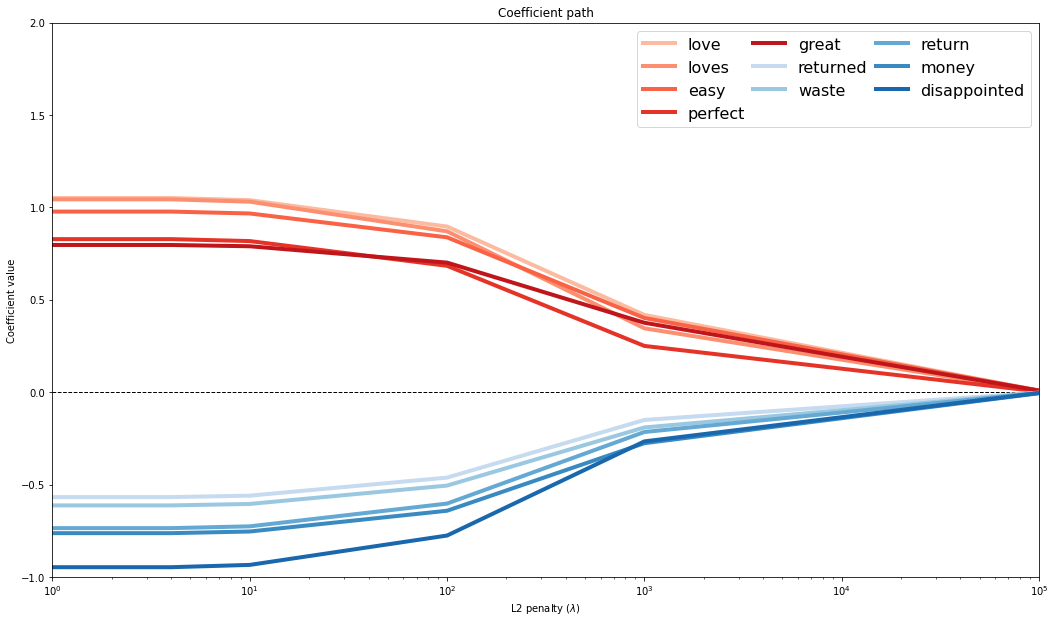

In [24]:
# Quiz questions 4 & 5 
plt.rcParams['figure.figsize'] = 15, 9
make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list=[0, 4, 10, 1e2, 1e3, 1e5])

#### 15. Measuring accuracy

In [25]:
# Quiz question 6 (training data)
for i in range(len(penalty_list)):
  #print(i)
  preds_prob = predict_probability(feature_matrix_train, coefs[i])
  accuracy = sum(np.where(sentiment_train > 0, 1, 0) == np.where(preds_prob > 0.5, 1, 0)) / len(sentiment_train)
  print('Accuracy for L2 penalty', f'{penalty_list[i]:>15}', '  :  ', f'{accuracy:.5f}')

Accuracy for L2 penalty               0   :   0.78520
Accuracy for L2 penalty               4   :   0.78511
Accuracy for L2 penalty              10   :   0.78494
Accuracy for L2 penalty           100.0   :   0.78398
Accuracy for L2 penalty          1000.0   :   0.77588
Accuracy for L2 penalty        100000.0   :   0.68032


In [26]:
# Quiz question 7 (validation data)
for i in range(len(penalty_list)):
  preds_prob = predict_probability(feature_matrix_valid, coefs[i])
  accuracy = sum(np.where(sentiment_valid > 0, 1, 0) == np.where(preds_prob > 0.5, 1, 0)) / len(sentiment_valid)
  print('Accuracy for L2 penalty', f'{penalty_list[i]:>15}', '  :  ', f'{accuracy:.5f}')

Accuracy for L2 penalty               0   :   0.78135
Accuracy for L2 penalty               4   :   0.78153
Accuracy for L2 penalty              10   :   0.78172
Accuracy for L2 penalty           100.0   :   0.78107
Accuracy for L2 penalty          1000.0   :   0.77145
Accuracy for L2 penalty        100000.0   :   0.66782
